# MOBDrone Dataset EDA and Preprocessing

## Importing Dependencies

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

import os
import json
import random
from pathlib import Path

from collections import Counter
from collections import defaultdict

## Loading the json annotation files

In [7]:
# === Load dataset ===
json_path_train = "./dataset/mobdrone/annotations/train_annotations.coco.json"
json_path_val = "./dataset/mobdrone/annotations/val_annotations.coco.json"
json_path_test = "./dataset/mobdrone/annotations/test_annotations.coco.json"
with open(json_path_train, 'r') as f:
    train_data = json.load(f)

with open(json_path_val, 'r') as f:
    val_data = json.load(f)

with open(json_path_test, 'r') as f:
    test_data = json.load(f)

## Going through the key and value pairs of annotation

In [8]:
train_data.keys()

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

In [9]:
val_data.keys()

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

In [10]:
test_data.keys()

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

In [11]:
for cat in train_data['categories']:
    print(cat)

{'id': 0, 'name': 'Person-Boat-Lifebuoy-Wood', 'supercategory': 'none'}
{'id': 1, 'name': 'boat', 'supercategory': 'Person-Boat-Lifebuoy-Wood'}
{'id': 2, 'name': 'life_buoy', 'supercategory': 'Person-Boat-Lifebuoy-Wood'}
{'id': 3, 'name': 'person', 'supercategory': 'Person-Boat-Lifebuoy-Wood'}
{'id': 4, 'name': 'surfboard', 'supercategory': 'Person-Boat-Lifebuoy-Wood'}
{'id': 5, 'name': 'wood', 'supercategory': 'Person-Boat-Lifebuoy-Wood'}


In [12]:
for cat in val_data['categories']:
    print(cat)

{'id': 0, 'name': 'Person-Boat-Lifebuoy-Wood', 'supercategory': 'none'}
{'id': 1, 'name': 'boat', 'supercategory': 'Person-Boat-Lifebuoy-Wood'}
{'id': 2, 'name': 'life_buoy', 'supercategory': 'Person-Boat-Lifebuoy-Wood'}
{'id': 3, 'name': 'person', 'supercategory': 'Person-Boat-Lifebuoy-Wood'}
{'id': 4, 'name': 'surfboard', 'supercategory': 'Person-Boat-Lifebuoy-Wood'}
{'id': 5, 'name': 'wood', 'supercategory': 'Person-Boat-Lifebuoy-Wood'}


In [13]:
for cat in test_data['categories']:
    print(cat)

{'id': 0, 'name': 'Person-Boat-Lifebuoy-Wood', 'supercategory': 'none'}
{'id': 1, 'name': 'boat', 'supercategory': 'Person-Boat-Lifebuoy-Wood'}
{'id': 2, 'name': 'life_buoy', 'supercategory': 'Person-Boat-Lifebuoy-Wood'}
{'id': 3, 'name': 'person', 'supercategory': 'Person-Boat-Lifebuoy-Wood'}
{'id': 4, 'name': 'surfboard', 'supercategory': 'Person-Boat-Lifebuoy-Wood'}
{'id': 5, 'name': 'wood', 'supercategory': 'Person-Boat-Lifebuoy-Wood'}


In [14]:
train_data['images'][0]

{'id': 0,
 'license': 1,
 'file_name': 'DJI_0915_0001_40m_000424_PNG.rf.d15a8aa5a21ba39395d7784e1a046192.jpg',
 'height': 640,
 'width': 640,
 'date_captured': '2023-01-30T01:04:43+00:00'}

In [15]:
val_data['images'][0]

{'id': 0,
 'license': 1,
 'file_name': 'DJI_0804_0014_50m_3_000312_PNG.rf.00fa90b37e4493198c9e622ad986f23e.jpg',
 'height': 640,
 'width': 640,
 'date_captured': '2023-01-30T01:04:43+00:00'}

In [16]:
test_data['images'][0]

{'id': 0,
 'license': 1,
 'file_name': 'DJI_0915_0001_40m_000223_PNG.rf.04c67b6e127e55bf6ae4f6ebee7de31b.jpg',
 'height': 640,
 'width': 640,
 'date_captured': '2023-01-30T01:04:43+00:00'}

In [17]:
for i in range(0,10):
    print(train_data['annotations'][i])

{'id': 0, 'image_id': 0, 'category_id': 3, 'bbox': [398, 348, 13.5, 22.5], 'area': 303.75, 'segmentation': [], 'iscrowd': 0}
{'id': 1, 'image_id': 0, 'category_id': 3, 'bbox': [491, 252, 11.5, 25], 'area': 287.5, 'segmentation': [], 'iscrowd': 0}
{'id': 2, 'image_id': 0, 'category_id': 1, 'bbox': [60, 125, 61, 174.5], 'area': 10644.5, 'segmentation': [], 'iscrowd': 0}
{'id': 3, 'image_id': 1, 'category_id': 3, 'bbox': [381, 623, 13.5, 15.5], 'area': 209.25, 'segmentation': [], 'iscrowd': 0}
{'id': 4, 'image_id': 1, 'category_id': 3, 'bbox': [475, 521, 15.5, 23], 'area': 356.5, 'segmentation': [], 'iscrowd': 0}
{'id': 5, 'image_id': 1, 'category_id': 1, 'bbox': [46, 401, 61, 178], 'area': 10858, 'segmentation': [], 'iscrowd': 0}
{'id': 6, 'image_id': 2, 'category_id': 3, 'bbox': [392, 268, 13.5, 22.5], 'area': 303.75, 'segmentation': [], 'iscrowd': 0}
{'id': 7, 'image_id': 2, 'category_id': 3, 'bbox': [488, 171, 11.5, 28.5], 'area': 327.75, 'segmentation': [], 'iscrowd': 0}
{'id': 8, 'i

In [18]:
for i in range(0,10):
    print(val_data['annotations'][i])

{'id': 0, 'image_id': 0, 'category_id': 5, 'bbox': [270, 151, 42, 45.5], 'area': 1911, 'segmentation': [], 'iscrowd': 0}
{'id': 1, 'image_id': 0, 'category_id': 1, 'bbox': [408, 23, 8.5, 16.5], 'area': 140.25, 'segmentation': [], 'iscrowd': 0}
{'id': 2, 'image_id': 0, 'category_id': 4, 'bbox': [426, 56, 7, 12.5], 'area': 87.5, 'segmentation': [], 'iscrowd': 0}
{'id': 3, 'image_id': 0, 'category_id': 3, 'bbox': [427, 49, 3.5, 11.5], 'area': 40.25, 'segmentation': [], 'iscrowd': 0}
{'id': 4, 'image_id': 0, 'category_id': 1, 'bbox': [423, 508, 23, 79.5], 'area': 1828.5, 'segmentation': [], 'iscrowd': 0}
{'id': 5, 'image_id': 0, 'category_id': 1, 'bbox': [481, 295, 23, 63.5], 'area': 1460.5, 'segmentation': [], 'iscrowd': 0}
{'id': 6, 'image_id': 0, 'category_id': 1, 'bbox': [569, 223, 15, 35.5], 'area': 532.5, 'segmentation': [], 'iscrowd': 0}
{'id': 7, 'image_id': 0, 'category_id': 1, 'bbox': [597, 4, 15, 15.5], 'area': 232.5, 'segmentation': [], 'iscrowd': 0}
{'id': 8, 'image_id': 0, 'c

In [19]:
for i in range(0,10):
    print(test_data['annotations'][i])

{'id': 0, 'image_id': 0, 'category_id': 3, 'bbox': [344, 84, 13.5, 22.5], 'area': 303.75, 'segmentation': [], 'iscrowd': 0}
{'id': 1, 'image_id': 1, 'category_id': 1, 'bbox': [36, 599, 57, 41], 'area': 2337, 'segmentation': [], 'iscrowd': 0}
{'id': 2, 'image_id': 2, 'category_id': 1, 'bbox': [214, 17, 99.5, 78], 'area': 7761, 'segmentation': [], 'iscrowd': 0}
{'id': 3, 'image_id': 3, 'category_id': 2, 'bbox': [112, 112, 8.5, 12], 'area': 102, 'segmentation': [], 'iscrowd': 0}
{'id': 4, 'image_id': 3, 'category_id': 3, 'bbox': [319, 100, 13.5, 25], 'area': 337.5, 'segmentation': [], 'iscrowd': 0}
{'id': 5, 'image_id': 3, 'category_id': 3, 'bbox': [222, 35, 14.5, 18.5], 'area': 268.25, 'segmentation': [], 'iscrowd': 0}
{'id': 6, 'image_id': 3, 'category_id': 5, 'bbox': [0, 623, 61, 16.5], 'area': 1006.5, 'segmentation': [], 'iscrowd': 0}
{'id': 7, 'image_id': 3, 'category_id': 5, 'bbox': [64, 589, 21.5, 51], 'area': 1096.5, 'segmentation': [], 'iscrowd': 0}
{'id': 8, 'image_id': 3, 'cate

## Basic EDA

In [20]:
# === Basic info ===
print("Number of images:", len(train_data['images']))
print("Number of annotations:", len(train_data['annotations']))
print("Number of categories:", len(train_data['categories']))

Number of images: 2566
Number of annotations: 10696
Number of categories: 6


In [21]:
# === Basic info ===
print("Number of images:", len(val_data['images']))
print("Number of annotations:", len(val_data['annotations']))
print("Number of categories:", len(val_data['categories']))

Number of images: 320
Number of annotations: 1320
Number of categories: 6


In [22]:
# === Basic info ===
print("Number of images:", len(test_data['images']))
print("Number of annotations:", len(test_data['annotations']))
print("Number of categories:", len(test_data['categories']))

Number of images: 320
Number of annotations: 1278
Number of categories: 6


In [23]:
image_id = train_data['images'][0]['id']
anns = [ann for ann in train_data['annotations'] if ann['image_id'] == image_id]
anns

[{'id': 0,
  'image_id': 0,
  'category_id': 3,
  'bbox': [398, 348, 13.5, 22.5],
  'area': 303.75,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 1,
  'image_id': 0,
  'category_id': 3,
  'bbox': [491, 252, 11.5, 25],
  'area': 287.5,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 2,
  'image_id': 0,
  'category_id': 1,
  'bbox': [60, 125, 61, 174.5],
  'area': 10644.5,
  'segmentation': [],
  'iscrowd': 0}]

In [24]:
def plot_category_distribution(data, title, ax):
    # === Category mapping ===
    cat_id_to_name = {c['id']: c['name'] for c in data['categories']}

    # === Category distribution ===
    cat_counts = Counter([ann['category_id'] for ann in data['annotations']])
    cat_counts_named = {cat_id_to_name[k]: v for k, v in cat_counts.items()}

    sns.barplot(
        x=list(cat_counts_named.keys()),
        y=list(cat_counts_named.values()),
        ax=ax
    )
    ax.set_title(title)
    ax.set_ylabel("Number of Objects")
    labels = ax.get_xticklabels()
    for label in labels:
        label.set_rotation(45)
        label.set_ha('right')

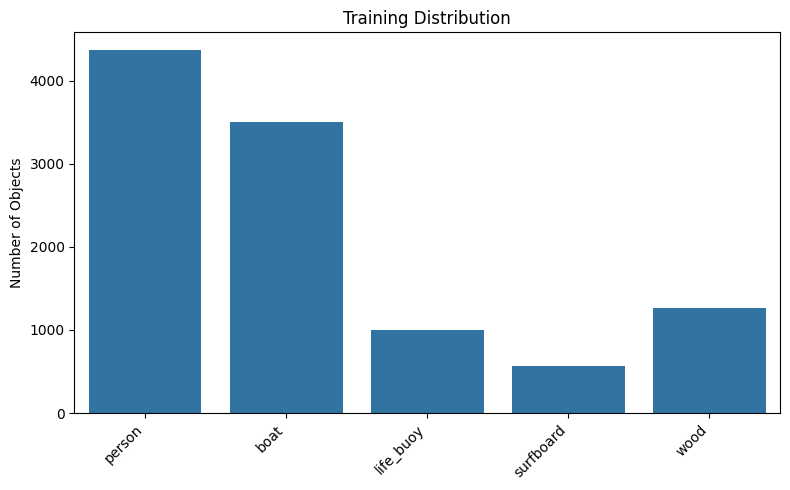

In [25]:
fig, axes = plt.subplots(1, 1, figsize=(8, 5), sharey=True)
plot_category_distribution(train_data, "Training Distribution", axes)
plt.tight_layout()
plt.show()

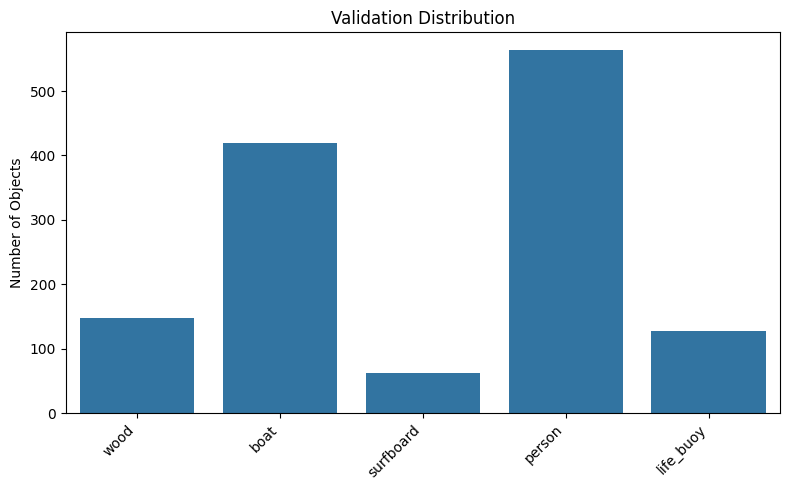

In [26]:
fig, axes = plt.subplots(1, 1, figsize=(8, 5), sharey=True)
plot_category_distribution(val_data, "Validation Distribution", axes)
plt.tight_layout()
plt.show()

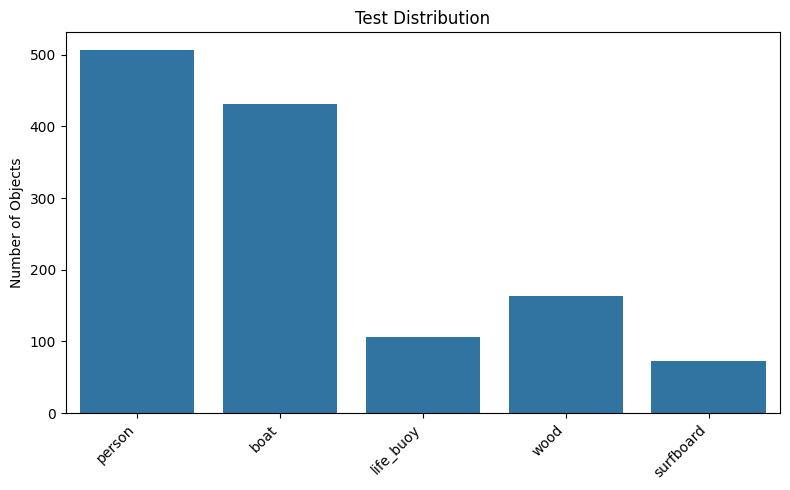

In [27]:
fig, axes = plt.subplots(1, 1, figsize=(8, 5), sharey=True)
plot_category_distribution(test_data, "Test Distribution", axes)
plt.tight_layout()
plt.show()

In [28]:
def print_category_distribution(data, title):
    # === Category mapping ===
    cat_id_to_name = {c['id']: c['name'] for c in data['categories']}

    # === Category distribution ===
    cat_counts = Counter([ann['category_id'] for ann in data['annotations']])
    cat_counts_named = {cat_id_to_name[k]: v for k, v in cat_counts.items()}

    print(f"\n{title}")
    for category, count in cat_counts_named.items():
        print(f"{category}: {count}")

In [29]:
# Example usage
print_category_distribution(train_data, "Train Data Distribution")
print_category_distribution(val_data, "Validation Data Distribution")
print_category_distribution(test_data, "Test Data Distribution")


Train Data Distribution
person: 4365
boat: 3499
life_buoy: 997
surfboard: 566
wood: 1269

Validation Data Distribution
wood: 148
boat: 420
surfboard: 62
person: 563
life_buoy: 127

Test Data Distribution
person: 506
boat: 431
life_buoy: 106
wood: 163
surfboard: 72


## Preprocessing

### COCO standardization

In [30]:
def clean_coco_categories(coco_data):
    """
    Cleans COCO-style annotation data by:
      1. Removing any 'supercategory placeholder' (like id=0 with combined name).
      2. Remapping category IDs so they start at 0 and are continuous.
      3. Updating annotations to use the new IDs.

    Args:
        coco_data (dict): Loaded COCO JSON (as Python dict).

    Returns:
        dict: Cleaned COCO JSON with fixed categories and annotations.
    """

    # Step 1: Filter out unwanted "supercategory placeholder" (id=0, with strange name)
    categories = [c for c in coco_data['categories'] if "-" not in c['name']]  

    # Step 2: Create new ID mapping (continuous starting from 0)
    old_to_new = {c['id']: new_id for new_id, c in enumerate(categories)}

    # Step 3: Update category IDs in categories list
    for new_id, c in enumerate(categories):
        c['id'] = new_id

    # Step 4: Update category_id in annotations
    new_annotations = []
    for ann in coco_data['annotations']:
        if ann['category_id'] in old_to_new:  # ignore invalid ones
            ann['category_id'] = old_to_new[ann['category_id']]
            new_annotations.append(ann)

    coco_data['categories'] = categories
    coco_data['annotations'] = new_annotations

    return coco_data

In [31]:
train_data = clean_coco_categories(train_data)
test_data = clean_coco_categories(test_data)
val_data = clean_coco_categories(val_data)

In [32]:
for cat in train_data['categories']:
    print(cat)
print()
for cat in val_data['categories']:
    print(cat)
print()
for cat in test_data['categories']:
    print(cat)

{'id': 0, 'name': 'boat', 'supercategory': 'Person-Boat-Lifebuoy-Wood'}
{'id': 1, 'name': 'life_buoy', 'supercategory': 'Person-Boat-Lifebuoy-Wood'}
{'id': 2, 'name': 'person', 'supercategory': 'Person-Boat-Lifebuoy-Wood'}
{'id': 3, 'name': 'surfboard', 'supercategory': 'Person-Boat-Lifebuoy-Wood'}
{'id': 4, 'name': 'wood', 'supercategory': 'Person-Boat-Lifebuoy-Wood'}

{'id': 0, 'name': 'boat', 'supercategory': 'Person-Boat-Lifebuoy-Wood'}
{'id': 1, 'name': 'life_buoy', 'supercategory': 'Person-Boat-Lifebuoy-Wood'}
{'id': 2, 'name': 'person', 'supercategory': 'Person-Boat-Lifebuoy-Wood'}
{'id': 3, 'name': 'surfboard', 'supercategory': 'Person-Boat-Lifebuoy-Wood'}
{'id': 4, 'name': 'wood', 'supercategory': 'Person-Boat-Lifebuoy-Wood'}

{'id': 0, 'name': 'boat', 'supercategory': 'Person-Boat-Lifebuoy-Wood'}
{'id': 1, 'name': 'life_buoy', 'supercategory': 'Person-Boat-Lifebuoy-Wood'}
{'id': 2, 'name': 'person', 'supercategory': 'Person-Boat-Lifebuoy-Wood'}
{'id': 3, 'name': 'surfboard', 

In [31]:
with open("./dataset/mobdrone/annotations/train_annotations_fixed.json", "w") as f:
    json.dump(train_data, f, indent=4)

with open("./dataset/mobdrone/annotations/test_annotations_fixed.json", "w") as f:
    json.dump(test_data, f, indent=4)

with open("./dataset/mobdrone/annotations/val_annotations_fixed.json", "w") as f:
    json.dump(val_data, f, indent=4)

### Converting to Yolo format

In [33]:
import json
import os
from pathlib import Path
from tqdm import tqdm
from PIL import Image

def coco_to_yolo(json_path, img_dir, out_dir):
    with open(json_path, 'r') as f:
        coco = json.load(f)

    # category mapping
    cats = {cat['id']: i for i, cat in enumerate(coco['categories'])}

    # image info dict
    images = {img['id']: img for img in coco['images']}

    os.makedirs(out_dir, exist_ok=True)

    for ann in tqdm(coco['annotations'], desc=f"Converting {json_path}"):
        img_info = images[ann['image_id']]
        img_w, img_h = img_info['width'], img_info['height']
        cat_id = cats[ann['category_id']]

        # bbox in coco = [x_min, y_min, width, height]
        x, y, w, h = ann['bbox']
        x_c = (x + w/2) / img_w
        y_c = (y + h/2) / img_h
        w /= img_w
        h /= img_h

        # save txt per image
        file_stem = Path(img_info['file_name']).stem
        out_file = Path(out_dir) / f"{file_stem}.txt"
        with open(out_file, "a") as f:
            f.write(f"{cat_id} {x_c:.6f} {y_c:.6f} {w:.6f} {h:.6f}\n")

# Example usage for your dataset
coco_to_yolo(
    json_path="./dataset/mobdrone/annotations/train.json",
    img_dir="./dataset/mobdrone/images/train",
    out_dir="./dataset/mobdrone/labels/train"
)

coco_to_yolo(
    json_path="./dataset/mobdrone/annotations/val.json",
    img_dir="./dataset/mobdrone/images/val",
    out_dir="./dataset/mobdrone/labels/val"
)

coco_to_yolo(
    json_path="./dataset/mobdrone/annotations/test.json",
    img_dir="./dataset/mobdrone/images/test",
    out_dir="./dataset/mobdrone/labels/test"
)


Converting ./dataset/mobdrone/annotations/train.json: 100%|█████████████████████| 10696/10696 [00:22<00:00, 472.02it/s]
Converting ./dataset/mobdrone/annotations/val.json: 100%|█████████████████████████| 1320/1320 [00:01<00:00, 667.34it/s]
Converting ./dataset/mobdrone/annotations/test.json: 100%|████████████████████████| 1278/1278 [00:03<00:00, 423.32it/s]
